Análise por Regressão
===================

Em uma tarefa de *classificação*, o objetivo é predizer o rótulo de um ponto de daods que não pertence a conjunto de dados de treinamento. Portanto, o uso de um modelo preditivo $f$ permite atribuir um rótulo $y$ à um ponto de dados $\vec{x}$, ou seja $y = f(\vec{x})$, onde $y$ é uma varíável categórica. Por outro lado, quando $y$ é uma varável numérica, dizemos que o problema é de **regressão** ou de **predição numérica**.

Esses modelos são populares porque podem ser ajustados muito rapidamente e são muito fáceis de interpretar. Você provavelmente está familiarizado com a forma mais simples de de regressão linear (ou seja, ajustar uma linha reta aos dados), mas esses modelos podem ser estendidos para modelar um comportamento de dados mais complicado.

Os problemas de regressão podem ser divididos em:
- Regressão linear simples;
- Regressão linear multivariada;
- Regressão não linear simples;
- Regressão não linear multivariada.

A diferença entre a regressão *linear* e a regressão *não linear* está na função $f$ a ser utilizada. Na regressão **linear** o modelo $f$ representa uma separação linear do espaço em que o problema se encontra. Em outras palavras, uma regressão linear no espaço bidimensional terá como modelo a equação de uma reta ($y = ax + b$); uma regressão linear no espaço tridimensional terá como modelo a equação de um plano ($y = a_1x + a_2x_2 + b$); um regressão linear no espaço quadridimensional terá como modelo a equação de um hiperplano ($y = a_1x_1 + a_2x_2 + a_3x_3 + b$); e assim por diante. Já no caso da regressão **não linear** o modelo $f$ será dado por equações polinomiais, logaritmicas, exponenciais, logísticas, trigonométricas, etc. A diferenciação entre *simples* e *multivariada* se refere à quantidade de atributos utilizados para a determinação do valor de $y$: um único atributo é utilizado no tipo **simples**, e mais de um atributo são usados no tipo **multivariado**.

Para decidir entre utilizar uma regressão linear ou não linear, geralmente se faz uma análise inicial dos dados, de forma a verificar o tipo de distribuição que os atributos assumem. Pode-se utilizar um gráfico de dispersão (*scatter plot*) para auxiliar neste processo. No caso de regressão não linear ainda é preciso verificar qual seria a melhor função de ajuste a ser usada, como polinomial, exponencial, logarítimica, etc.

Começaremos com uma rápida e intuitiva explicação da matemática por trás desse problema, antes de prosseguirmos para ver como os modelos lineares podem ser generalizados para levar em conta padrões mais complicados de dados.

Começamos com as importações padrão:

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# 1. Regressão Linear Simples

A **regressão linear** consiste em uma análise estatística que envolve duas variáveis: a de resposta, ou explicada, ou dependente ($y$); e a preditora, ou explicativa, ou independente ($\vec{x}$).

Começaremos com a regressão linear mais familiar, um ajuste linear aos dados. Um ajuste em linha reta é um modelo da forma $y = ax + b$, onde $a$ é comumente conhecido como *inclinação*, e $b$ é comumente conhecido como o *intercepto*.

Na solução da tarefa de regressão, deve-se encontrar valores para os coeficientes de regresão, de forma que a reta se ajuste aos valores assumidos pelas variáveis nos exemplares de um conjunto de dados. O objetivo é minimizar o somatório dos *resíduos*, ou seja, o somatório das diferenças entre o valor real e o estimado pelo modelo. A figura abaixo ilustr a ideia de residuo:

![Resíduos em Regressão Linear](linear-residual.png)

Para uma descrição mais detalhada da teoria envolvida neste processo, consulte a página da Wikipédia.com sobre [Regressão Linear](https://en.wikipedia.org/wiki/Linear_regression).

O melhor ajuste para a reta pode ser encontrado pelo método de *mínimos quadrados*, que minimiza o erro entre os valores dos pontos no conjunto de dados e os valores estimados pelo modelo. Considere que o conjunto de dados idsponível para treinamento seja $\displaystyle \mathbf{X_t} = \{\vec{x}_i, y_i\}$, para $i = 1, \ldots, n$. Os coeficientes de regressão podem ser estimados usando o método dos mínimos quadrados, traduzido pelas seguintes equações:

\begin{equation}
b = \frac{\sum_{i=1}^n (x_i - \mu_x)(y_i - \mu_y)}{\sum_{i=1}^n (x_i - \mu_x)^2}
\end{equation}

\begin{equation}
a = \mu_y - b\mu_x
\end{equation}

Onde $\mu_x$ é a média dos valores de $x_1, x_2, \ldots, x_n$, e $\mu_y$ é a média dos valores de $y_1, y_2, \ldots, y_n$. Para saber mais sobre a teoria por trás do método do mínimos quadrados consulte a página [WolframMathWorld | Least Squares Fitting](http://mathworld.wolfram.com/LeastSquaresFitting.html).

Felizmente, não é necessário implementar o método dos *mínimos quadrados* manualmente pois ele já está disponível na biblioteca Scikit-Learn.

Considere os seguintes dados, que estão espalhados sobre uma linha com uma inclinação de $2$ e um intercept de $-5$.

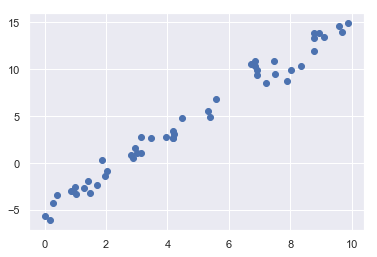

In [33]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Podemos usar o estimador [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) do Scikit-Learn para ajustar esses dados e construir a linha de melhor ajuste.

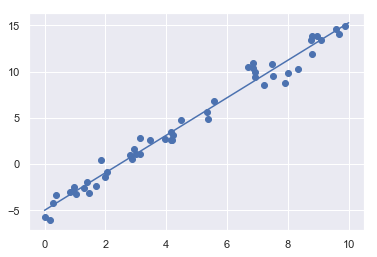

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

A inclinação e a interceptação dos dados estão contidas nos parâmetros de ajuste do modelo, que no Scikit-Learn são sempre marcados por um sublinhado à direita. Aqui os parâmetros relevantes são `coef_` e `intercept_`:

In [35]:
print("Inclinação: ", model.coef_)
print("Intercept:  ", model.intercept_)

Inclinação:  [2.02720881]
Intercept:   -4.998577085553204


Vemos que os resultados estão muito próximos dos “reais” usados para gerar os dados, como poderíamos esperar.

Entretanto, o estimador `LinearRegression` é muito mais capaz do que isso &mdash; além de ajustes simples em linha reta, ele também pode manipular modelos lineares multidimensionais da forma:

\begin{equantion}
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
\end{equation}

Onde existem vários valores $x$. Geometricamente, isso é como ajustar um plano a pontos em três dimensões, ou encaixar um hiperplano em pontos de dimensões mais altas.

A natureza multidimensional dessas regressões as torna mais difíceis de visualizar, mas podemos ver um desses ajustes em ação através da construção de alguns dados de exemplo, usando o operador de multiplicação de matrizes do NumPy:

In [36]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000155
[ 1.5 -2.   1. ]


Aqui os dados $y$ são construídos a partir de três valores aleatórios de x, e a regressão linear recupera os coeficientes usados para construir os dados.

Dessa forma, podemos usar o estimador LinearRegression para ajustar linhas, planos ou hiperplanos a nossos dados. Ainda parece que essa abordagem seria limitada a relações estritamente lineares entre variáveis, mas também podemos relaxar isso.

# 2. Regressão de Funções de Base

Um truque que podemos usar para adaptar a regressão linear a relações não-lineares entre variáveis é transformar os dados de acordo com *funções de base*.

A ideia é pegar nosso modelo linear multidimensional:

\begin{equation}
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
\end{equation}

E construir $x_1$, $x_2$, $x_3$ e assim por diante a partir de nossa entrada unidimensional $x$. Ou seja, fazemos $x_n = f_n(x)$, onde $f_n$ é alguma função que transforma nossos dados.

Por exemplo, se $f_n(x) = x^n$, nosso modelo se torna uma regressão polinomial:

\begin{equation}
y = a_0 + a_1 x + a_2 x_2 + a_3 x_3 + \cdots
\end{equation}

Note que este ainda é um modelo linear &mdash; a linearidade refere-se ao fato de que os coeficientes $a_i$ nunca se multiplicam ou se dividem. O que efetivamente fizemos foi extrair os valores $x$ unidimensionais e projetá-los em uma dimensão mais alta, de modo que um ajuste linear possa se encaixar em relações mais complicadas entre $x$ e $y$.


## 2.1. Funções de Base Polinomiais

Essa projeção polinomial é útil o suficiente para ser incorporada ao Scikit-Learn, usando o transformador `PolynomialFeatures`:

In [37]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Vemos aqui que o transformador converteu nosso array unidimensional em um array tridimensional, tomando o expoente de cada valor. Essa nova representação de dados de dimensão superior pode então ser conectada a uma regressão linear.

A maneira mais “limpa” de conseguir isso é usar um pipeline. Vamos fazer um modelo polinomial de 7º grau desta maneira:

In [38]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

Com essa transformação, podemos usar o modelo linear para ajustar relações muito mais complicadas entre xe y. Por exemplo, aqui está uma onda senoidal com ruído.

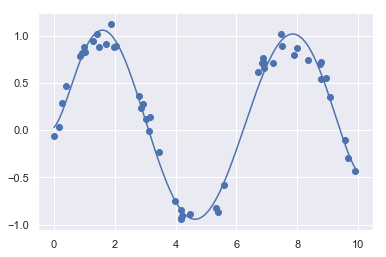

In [39]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

Nosso modelo linear, através do uso de funções de base polinomiais de 7ª ordem, pode fornecer um excelente ajuste a esses dados não-lineares!

## 2.2. Funções de Base Gaussianas

Naturalmente, outras funções básicas são possíveis. Por exemplo, um padrão útil é ajustar um modelo que não seja uma soma de bases polinomiais, mas uma soma de bases gaussianas. O resultado pode parecer algo como a figura abaixo.

![Gaussian Basis](gaussian-basis.png)

As regiões sombreadas no gráfico acima são as funções de base gaussianas escalonadas e, quando somadas, reproduzem a curva suave que se ajusta aos dados. Essas funções de base gaussiana não são construídas no Scikit-Learn, mas podemos escrever um transformador personalizado que as criará, como mostrado aqui (os transformadores do Scikit-Learn são implementados como classes Python; ler o código fonte do Scikit-Learn é uma boa maneira de ver como eles podem ser criados):

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

Uma vez que o transformador de Bases Gaussianas esteja implementado, podemos imitar o processo utilizado para criar um *regressor polinomial* visto acima para criar um *regressor gaussiano*.

50
50


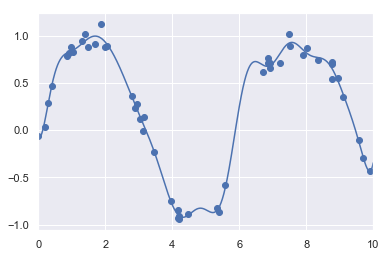

In [50]:
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

Colocamos este exemplo aqui apenas para deixar claro que não há nada de mágico sobre funções de base polinomial: se você tem algum tipo de intuição no processo de geração de seus dados que faz você pensar que uma base ou outra pode ser mais apropriada, você pode usá-la bem.

# 3. Regularização

A introdução de funções de base em nossa regressão linear torna o modelo muito mais flexível, mas também pode levar rapidamente ao ajuste excessivo (*over-fitting*). Por exemplo, se escolhermos muitas funções de base gaussiana, acabamos com resultados que não parecem tão bons:

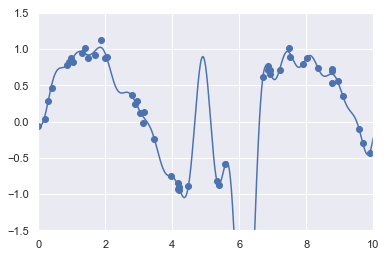

In [11]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

Com os dados projetados para a base de 30 dimensões, o modelo tem muita flexibilidade e vai para valores extremos entre locais onde deveria ser restringido por dados. Podemos ver a razão para isso se traçarmos os coeficientes das bases gaussianas em relação às suas localizações:

In [12]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel='localização da base', ylabel='coeficiente', xlim=(0, 10))

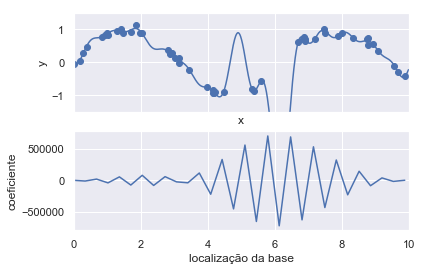

In [13]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

O painel inferior da figura acima mostra a amplitude da função de base em cada localização. Esse é um comportamento típico de sobreposição quando as funções de base se sobrepõem: os coeficientes das funções de base adjacentes explodem e se anulam mutuamente. Sabemos que tal comportamento é problemático, e seria bom se pudéssemos limitar esses picos de forma explícita no modelo penalizando grandes valores dos parâmetros do modelo. Tal penalidade é conhecida como **regularização** e vem em várias formas.

## 3.1. Regressão de Rebordo (Regularização $L_2$)

Talvez a forma mais comum de regularização seja conhecida como **regressão de rebordo** ou **regularização $L_2$**, às vezes também chamada de *Regularização de Tikhonov*. Ela prossegue penalizando a soma dos quadrados (norma-2) dos coeficientes do modelo; Nesse caso, a penalidade no ajuste do modelo seria:

\begin{equation}
P = \alpha\sum_{n=1}^N \theta^2_n
\end{equation}

Onde $\alpha$ é um parâmetro livre que controla a força da penalidade. Este tipo de modelo penalizado é construído no Scikit-Learn com o estimador `Ridge`:

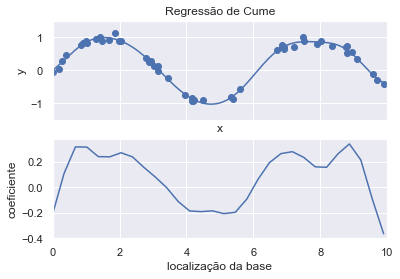

In [14]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Regressão de Cume')

O parâmetro $\alpha$ é essencialmente um botão que controla a complexidade do modelo resultante. No limite $\alpha \to 0$, recuperamos o resultado da regressão linear padrão; no limite $\alpha \to \infty$, todas as respostas do modelo serão suprimidas. Uma vantagem da regressão de rebordo em particular é que ela pode ser computada de maneira muito eficiente &mdash; com um custo computacional dificilmente maior do que o modelo de regressão linear original.

## 3.2. Regressão de Laço (Regularização $L_1$)

Outro tipo muito comum de regularização é conhecido como **regressão de laço** e envolve a penalização da soma dos valores absolutos (norma-1) dos coeficientes de regressão:

\begin{equation}
P = \alpha\sum_{n=1}^N \left|\theta_n\right|
\end{equation}

Embora isso seja conceitualmente muito semelhante à regressão de rebordo, os resultados podem diferir surpreendentemente: por exemplo, devido a razões geométricas, a regressão de laço tende a favorecer modelos esparsos quando possível. Ou seja, preferencialmente define coeficientes de modelo para exatamente zero.

Podemos ver esse comportamento ao duplicar a figura da regressão de rebordo, mas usando coeficientes normalizados para $L_1$:

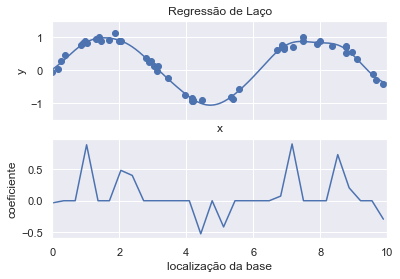

In [15]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001, max_iter=2000))
basis_plot(model, title='Regressão de Laço');

Com a penalidade da regressão de laço, a maioria dos coeficientes é exatamente zero, com o comportamento funcional sendo modelado por um pequeno subconjunto das funções de base disponíveis. Assim como na regularização por rebordo, o parâmetro $\alpha$ ajusta a intensidade da penalidade e deve ser determinado por meio de, por exemplo, validação cruzada.

# 4. Exemplo: Previsão do Tráfego de Bicicletas

Como exemplo, vamos dar uma olhada se podemos prever o número de viagens de bicicleta pela Ponte Fremont de Seattle (disponibilizada pela prefeitura de Seattle) com base no clima, na estação e em outros fatores.

Nesta seção, uniremos os dados sobre bicicletas com outro conjunto de dados e tentaremos determinar em que medida o clima e os fatores sazonais &mdash; temperatura, precipitação e horário de verão &mdash; afetam o volume do tráfego de bicicletas por esta via. Felizmente, o NOAA disponibiliza seus [dados diários de estações meteorológicas](http://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND) (usei a ID de estação USW00024233 &ndash; como o processamento do pedido de dados leva alguns minutos, é melhor baixar o arquivo que está no AVA) e podemos facilmente usar Pandas para unir as duas fontes de dados. Realizaremos uma regressão linear simples para relacionar informações meteorológicas e outras informações às contagens de bicicletas, a fim de estimar como uma alteração em qualquer um desses parâmetros afeta o número de passageiros em um determinado dia.

Em particular, este é um exemplo de como as ferramentas do Scikit-Learn podem ser usadas em uma estrutura de modelagem estatística, na qual os parâmetros do modelo são assumidos como tendo um significado interpretável. Como discutido anteriormente, essa não é uma abordagem padrão no aprendizado de máquina, mas tal interpretação é possível para alguns modelos.

Vamos começar carregando os dois conjuntos de dados, indexando por data:


In [16]:
# Execute o comando abaixo, ou baixe o arquivo CSV da página do AVA e salve na mesma pasta que este notebook.

#!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [17]:
import pandas as pd
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

Em seguida, calcularemos o tráfego diário total de bicicletas e colocaremos isso em seu próprio dataframe:

In [18]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove outras colunas

Acreditamos que os padrões de uso geralmente variam de um dia para o outro; vamos explicar isso em nossos dados adicionando colunas binárias que indicam o dia da semana:

In [19]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

Da mesma forma, podemos esperar que os passageiros se comportem de maneira diferente nos feriados; vamos adicionar um indicador disso também:

In [20]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2018')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

Também podemos suspeitar que a quantidade de horas de luz do dia afetariam o número de pessoas que andam de bicicleta. Vamos usar o [cálculo astronômico padrão](https://pt.wikipedia.org/wiki/Dura%C3%A7%C3%A3o_do_dia#C%C3%A1lculo_da_dura%C3%A7%C3%A3o_do_dia) para adicionar esta informação:

In [21]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))

(8, 17)

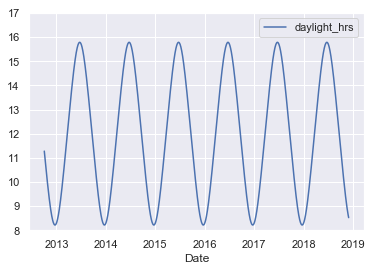

In [22]:
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

Também podemos adicionar a temperatura média e precipitação total aos dados. Além dos milímetros de precipitação, vamos adicionar um sinalizador que indica se um dia está seco (tem precipitação zero):

In [23]:
# temperaturas estão em 1/10 °C; converter para °C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precipitação está em 1/10 mm; convert to mm
weather['PRCP'] /= 10
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

Finalmente, vamos adicionar um contador que aumenta a partir do dia 1 e mede quantos anos se passaram. Isso nos permitirá medir qualquer aumento ou diminuição anual observado nas travessias diárias:

In [24]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.0

Agora nossos dados estão em ordem, e podemos dar uma olhada neles:

In [25]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,1.335,1.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,1.360,1.0,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,1.530,1.0,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,1.585,1.0,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,1.585,1.0,0.010959


Com isso, podemos escolher as colunas a serem usadas e ajustar um modelo de regressão linear aos nossos dados. Vamos definir `fit_intercept = False`, porque as flags diárias operam essencialmente como suas próprias interceptações específicas do dia:

In [26]:
# Drop qualquer linha com valores nulos
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']

X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

Finalmente, podemos comparar o tráfego de bicicleta total e previsto visualmente:

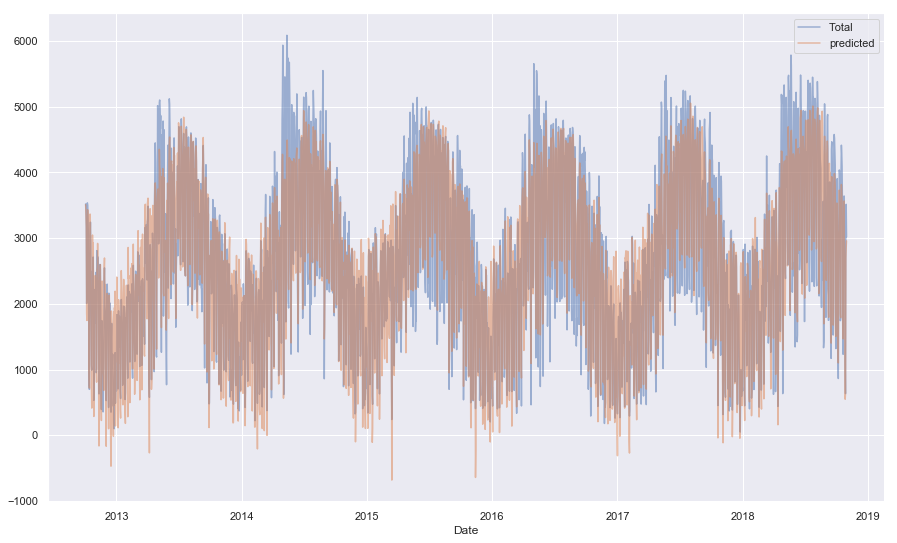

In [27]:
daily[['Total', 'predicted']].plot(figsize=(15,9), alpha=0.5);

É evidente que perdemos algumas características-chave, especialmente durante o horário de verão. Ou nossas características não estão completos (ou seja, as pessoas decidem se querem andar de bicicleta com base em mais do que apenas isso) ou há alguns relacionamentos não lineares que não levamos em conta (por exemplo, talvez as pessoas andem menos em altas e em baixas temperaturas). No entanto, nossa aproximação groceira já é suficiente para nos dar algumas idéias, e podemos dar uma olhada nos coeficientes do modelo linear para estimar quanto cada característica contribui para a contagem diária de bicicletas:

In [28]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              654.993342
Tue              797.710459
Wed              775.420940
Thu              630.940590
Fri              309.829254
Sat            -1051.471515
Sun            -1141.392849
holiday        -1204.257421
daylight_hrs     112.067073
PRCP            -274.640535
dry day          509.868483
Temp (C)         719.294507
annual            40.879087
dtype: float64

Esses números são difíceis de interpretar sem alguma medida de sua incerteza. Podemos calcular essas incertezas rapidamente usando a reamostragem de bootstrap dos dados:

In [29]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_ for i in range(1000)], 0)

Com esses erros estimados, vamos analisar novamente os resultados:

In [30]:
print(pd.DataFrame({'efeito': params.round(0), 'erro': err.round(0)}))

              efeito   erro
Mon            655.0   61.0
Tue            798.0   65.0
Wed            775.0   64.0
Thu            631.0   63.0
Fri            310.0   63.0
Sat          -1051.0   62.0
Sun          -1141.0   62.0
holiday      -1204.0  115.0
daylight_hrs   112.0    7.0
PRCP          -275.0   17.0
dry day        510.0   24.0
Temp (C)       719.0   30.0
annual          41.0    6.0


Primeiro, vemos que há uma tendência relativamente estável na linha de base semanal: há muito mais ciclistas durante a semana do que nos finais de semana e feriados. Vemos que para cada hora adicional de luz do dia, 112 &pm; 7 pessoas optam por pedalar; um aumento de temperatura de um grau Celsius encoraja 719 &pm; 30 pessoas a pegar sua bicicleta; um dia seco significa uma média de 510 &pm; 24 ciclistas a mais, e a cada milímetro de precipitação significa que 275 &pm; 17 pessoas deixam a bicicleta em casa. Uma vez que todos esses efeitos são contabilizados, vemos um aumento modesto de 41 &pm; 6 novos usuários diários a cada ano.

É quase certo que haja informações relevantes faltando em nosso modelo. Por exemplo, efeitos não-lineares (como efeitos de precipitação e temperatura fria) e tendências não-lineares dentro de cada variável (como a falta de inclinação de pedalar em temperaturas muito frias e muito altas) não podem ser explicados neste modelo. Além disso, descartamos algumas informações mais refinadas (como a diferença entre uma manhã chuvosa e uma tarde chuvosa), e ignoramos as correlações entre os dias (como o possível efeito de uma terça-feira chuvosa nos números de quarta-feira, ou o efeito de um dia ensolarado inesperado depois de uma raia de dias chuvosos). Estes são todos efeitos potencialmente interessantes, e agora você tem as ferramentas para começar a explorá-los, se desejar!